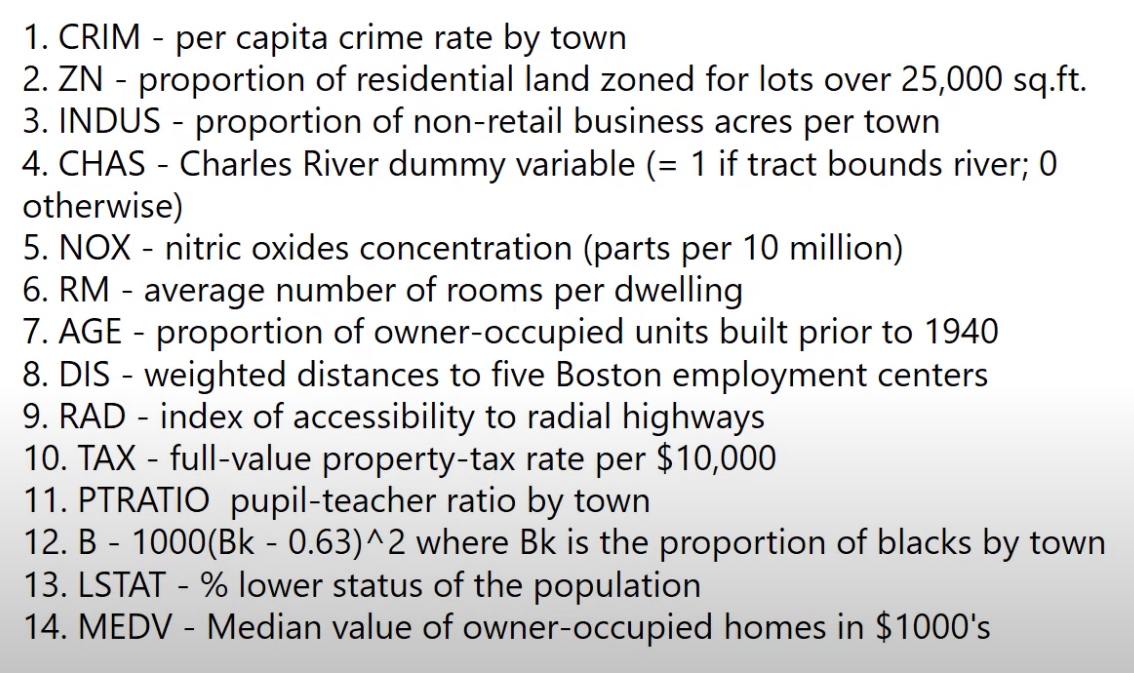

In [1]:
# Import data from pandas
import pandas as pd

boston = pd.read_csv('boston-housing-dataset.csv', index_col=0)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
# Import data from Keras
import numpy as np
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense

In [3]:
# Set seed
np.random.seed(42)

In [4]:
# Split data into train/test
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

# Standardize data to improve NN forecast

In [5]:
# Standardize the data (avg = 0, deviation=1)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [6]:
x_train

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [7]:
# Create architecture of NN
model = Sequential()
model.add(Dense(units=128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [8]:
# Fit our NN
model.fit(x_train, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
404/404 - 1s - loss: 259.4618 - mae: 13.3912 - 1s/epoch - 3ms/step
Epoch 2/100
404/404 - 1s - loss: 38.3429 - mae: 4.3590 - 519ms/epoch - 1ms/step
Epoch 3/100
404/404 - 1s - loss: 26.3115 - mae: 3.5042 - 519ms/epoch - 1ms/step
Epoch 4/100
404/404 - 0s - loss: 21.4850 - mae: 3.2525 - 480ms/epoch - 1ms/step
Epoch 5/100
404/404 - 0s - loss: 18.4112 - mae: 3.0680 - 477ms/epoch - 1ms/step
Epoch 6/100
404/404 - 0s - loss: 15.9894 - mae: 2.7997 - 477ms/epoch - 1ms/step
Epoch 7/100
404/404 - 0s - loss: 14.0780 - mae: 2.6279 - 490ms/epoch - 1ms/step
Epoch 8/100
404/404 - 0s - loss: 12.4644 - mae: 2.5021 - 492ms/epoch - 1ms/step
Epoch 9/100
404/404 - 0s - loss: 11.0397 - mae: 2.3701 - 490ms/epoch - 1ms/step
Epoch 10/100
404/404 - 0s - loss: 10.6469 - mae: 2.2932 - 492ms/epoch - 1ms/step
Epoch 11/100
404/404 - 0s - loss: 9.8135 - mae: 2.2449 - 488ms/epoch - 1ms/step
Epoch 12/100
404/404 - 0s - loss: 9.5148 - mae: 2.2130 - 493ms/epoch - 1ms/step
Epoch 13/100
404/404 - 0s - loss: 9.5964

In [9]:
# Model evaluation
mse, mae = model.evaluate(x_test, y_test)
print(mae)
print(mse)

4/4 [==============================] - 0s 2ms/step - loss: 11.8572 - mae: 2.3392
2.339200019836426
11.857192039489746


In [10]:
# Prediction
pred = model.predict(x_test)
pred[:5]

4/4 [==============================] - 0s 2ms/step


array([[ 8.351699],
       [18.18979 ],
       [21.770483],
       [33.04134 ],
       [23.931662]], dtype=float32)